## **Práctica 10: Clasificación logística**

Nombre:

No. Cuenta:

Email:

### **Caso de estudio**

Estudios clínicos de diabetes en una población femenina.

**Objetivo.** Clasificar si una persona tiene diabetes o no, en función de otros parámetros disponibles, como número de embarazos, glucosa, presión arterial, índice de masa corporal, los niveles de insulina, entre otros. Este es un problema de clasificación y se requiere obtener el mejor modelo de aprendizaje automático para predecir la diabetes.

**Emplear los algoritmos:** 

* Regresión logística.
* Árbol de decisión.
* Bosque aleatorio.
* Máquinas de soporte vectorial.

**Fuente de datos:**

https://www.kaggle.com/saurabh00007/diabetescsv

**Variables:**

* Número de embarazos (Pregnancies): número de veces que ha estado embarazada la persona.

* Concentración de glucosa en plasma (Glucose): cantidad de glucosa en la sangre. Cuando una persona ha ingerido alimento los valores normales son menores a 140 mg/DL y cuando los resultados se dan entre 140 a 190 son indicativos de diabetes.

* Presión arterial diastólica (BloodPressure): es la cantidad de presión que hay en las arterias ente un latido y otro.

* Espesor del pliegue cutáneo (SkinThickness): es un procedimiento frecuentemente utilizado, en combinación con el índice de masa corporal (IMC), para estimar la grasa corporal. Medir los pliegues cutáneos permite valorar los depósitos de grasa del cuerpo humano. A modo de referencia, según la medicina el espesor normal: ♂ 12 mm; ♀ 23 mm.

* Insulina (Insulin): es una prueba de insulina que consiste analizar antes de administrar la glucosa y 2 horas después. La razón por la que se realizan estas pruebas es para ver la curva de respuesta a la glucosa.

* Índice de masa corporal (BMI): es utilizado para estimar la cantidad de grasa corporal, y determinar si el peso está dentro del rango normal, o por el contrario, se tiene sobrepeso o delgadez.

* Función pedigrí de la diabetes (DiabetesPedigreeFunction): es una función que califica la probabilidad de diabetes según los antecedentes familiares.

* Edad en años (Age).

* Resultado (Outcome): si es positivo o negativo al diagnóstico de diabetes.

### **I. Acceso a datos y selección de características**

#### **1) Acceso a los datos**

In [1]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline

In [2]:
Diabetes = pd.read_csv('Datos/Diabetes.csv')
Diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
print(Diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


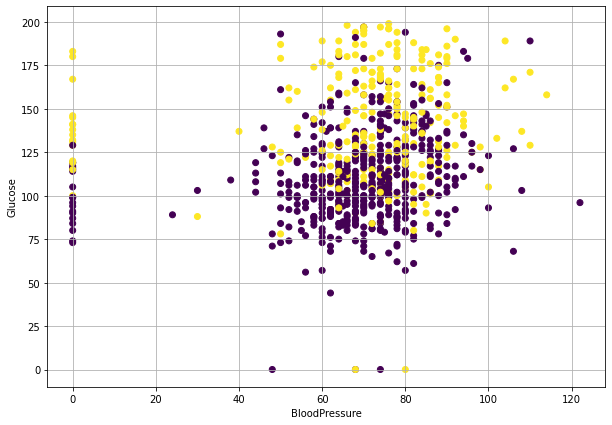

In [5]:
plt.figure(figsize=(10, 7))
plt.scatter(Diabetes['BloodPressure'], Diabetes['Glucose'], c = Diabetes.Outcome)
plt.grid()
plt.xlabel('BloodPressure')
plt.ylabel('Glucose')
plt.show()

In [6]:
Diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### **2) Selección de características**

A través de un mapa de calor de identifican posibles variables correlacionadas.

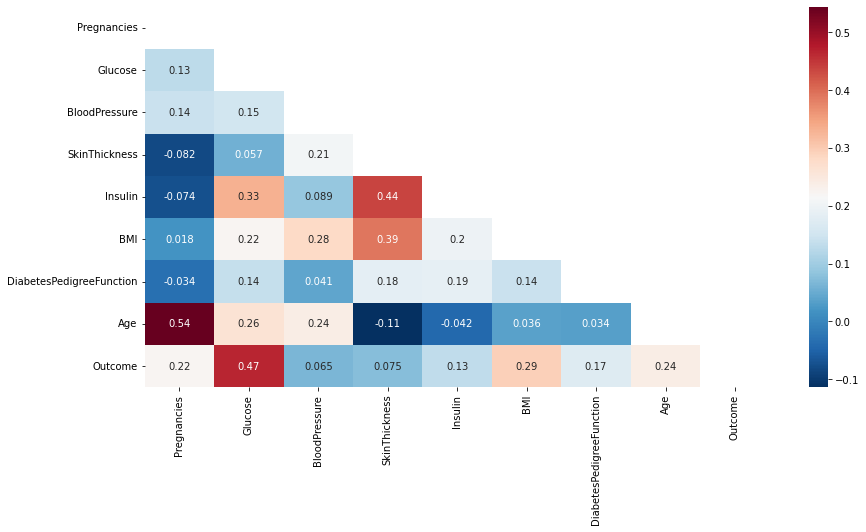

In [7]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(Diabetes.corr())
sns.heatmap(Diabetes.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

**Varibles seleccionadas:**

Ante la no presencia de correlaciones altas (fuertes), se consideran a todas las variables para la construcción de los modelos.

#### **3) Definición de las variables predictoras y variable clase**


In [8]:
#Variables predictoras
X = np.array(Diabetes[['Pregnancies', 
                       'Glucose', 
                       'BloodPressure', 
                       'SkinThickness', 
                       'Insulin', 
                       'BMI',
                       'DiabetesPedigreeFunction',
                       'Age']])
pd.DataFrame(X)

,0,1,2,3,4,5,6,7
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [9]:
#Variable clase
Y = np.array(Diabetes[['Outcome']])
pd.DataFrame(Y)

,0
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


### **II. Creación de los modelos**


#### **Modelo 1: Regresión Logística**

In [10]:
from sklearn import model_selection
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [11]:
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, 
                                                                                test_size = 0.2, 
                                                                                random_state = 0,
                                                                                shuffle = True)

In [12]:
print(len(X_train))
print(len(X_validation))

614
154


In [13]:
#Se entrena el modelo a partir de los datos de entrada
ClasificacionRL = linear_model.LogisticRegression()
ClasificacionRL.fit(X_train, Y_train)

/Users/guillermo-molero/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/guillermo-molero/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
#Predicciones probabilísticas
Probabilidad = ClasificacionRL.predict_proba(X_validation)
pd.DataFrame(Probabilidad)

,0,1
0,0.037008,0.962992
1,0.829267,0.170733
2,0.898232,0.101768
3,0.379162,0.620838
4,0.870824,0.129176
...,...,...
149,0.812269,0.187731
150,0.916601,0.083399
151,0.310195,0.689805
152,0.892051,0.107949


In [15]:
#Clasificación final 
Y_ClasificacionRL = ClasificacionRL.predict(X_validation)
print(Y_ClasificacionRL)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0]


In [16]:
accuracy_score(Y_validation, Y_ClasificacionRL)

0.8246753246753247

### **III. Validación**


#### **Validación: Regresión Logística**

In [17]:
#Matriz de clasificación
ModeloClasificacion = ClasificacionRL.predict(X_validation)
Matriz_Clasificacion = pd.crosstab(Y_validation.ravel(), 
                                   ModeloClasificacion, 
                                   rownames=['Reales'], 
                                   colnames=['Clasificación']) 
Matriz_Clasificacion

Clasificación,0,1
Reales,,
0,98,9
1,18,29


In [18]:
#Reporte de la clasificación
print("Exactitud:", accuracy_score(Y_validation, Y_ClasificacionRL))
print(classification_report(Y_validation, Y_ClasificacionRL))

Exactitud: 0.8246753246753247
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



In [19]:
from sklearn.metrics import RocCurveDisplay

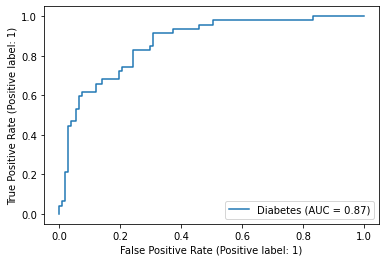

In [22]:
CurvaROC = RocCurveDisplay.from_estimator(ClasificacionRL, X_validation, Y_validation, name="Diabetes")
plt.show()

### **IV. Nuevas clasificaciones**


In [23]:
#Paciente
PacienteID = pd.DataFrame({'Pregnancies': [1],
                           'Glucose': [126],
                           'BloodPressure': [60],
                           'SkinThickness': [23],
                           'Insulin': [94],
                           'BMI': [30.1],
                           'DiabetesPedigreeFunction': [0.349],
                           'Age': [47]})
ClasificacionRL.predict(PacienteID)

/Users/guillermo-molero/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0])